In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, SpatialDropout1D, TimeDistributed, Input, concatenate
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

In [3]:
# Read csv

df = pd.read_csv("COVID Fake News Without Text Augmentation.csv")
df

,Unnamed: 0,Date Posted,Text,Label
0,0,2/11/20,just in novel coronavirus named covid-19 un he...,1
1,1,2/12/20,who officially names coronavirus as covid-19 c...,1
2,2,2/12/20,the un health agency announced that covid-19 w...,1
3,3,2/14/20,the indian embassy in tokyo has said that one ...,1
4,4,2/15/20,ground zero how kerala used its experience in ...,1
...,...,...,...,...
7583,7583,6/23/20,bill gates said that the covid-19 vaccine wil...,0
7584,7584,6/23/20,covid-19 vaccine candidates will insert micro...,0
7585,7585,6/23/20,an image claims that chroma screen panels are...,0
7586,7586,6/23/20,alexandria ocasio-cortez tweeted its vital th...,0


In [5]:
df = df[df['Text'].notna()]
df

,Unnamed: 0,Date Posted,Text,Label
0,0,2/11/20,just in novel coronavirus named covid-19 un he...,1
1,1,2/12/20,who officially names coronavirus as covid-19 c...,1
2,2,2/12/20,the un health agency announced that covid-19 w...,1
3,3,2/14/20,the indian embassy in tokyo has said that one ...,1
4,4,2/15/20,ground zero how kerala used its experience in ...,1
...,...,...,...,...
7583,7583,6/23/20,bill gates said that the covid-19 vaccine wil...,0
7584,7584,6/23/20,covid-19 vaccine candidates will insert micro...,0
7585,7585,6/23/20,an image claims that chroma screen panels are...,0
7586,7586,6/23/20,alexandria ocasio-cortez tweeted its vital th...,0


In [6]:
#get max sequence length
result = []

def longest_tweet(text, result):
  result.append(len(text))

df["Text"].apply(lambda x: longest_tweet(x, result))
max(result)

493

In [16]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each review.
MAX_SEQUENCE_LENGTH = 429
# This is fixed.
EMBEDDING_DIM = 64
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 12814 unique tokens.


In [17]:
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (7586, 429)


In [18]:
# Y = pd.get_dummies(df['Binary Label']).values
# print('Shape of label tensor:', Y.shape)
Y = df["Label"]

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6068, 429) (6068,)
(1518, 429) (1518,)


In [20]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(64, dropout=0.4)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
epochs = 10
batch_size = 256

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_test, Y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
24/24 [==============================] - 66s 3s/step - loss: 0.6713 - accuracy: 0.6170 - val_loss: 0.5820 - val_accuracy: 0.7767
Epoch 2/10
24/24 [==============================] - 62s 3s/step - loss: 0.3848 - accuracy: 0.8490 - val_loss: 0.2586 - val_accuracy: 0.8827
Epoch 3/10
24/24 [==============================] - 61s 3s/step - loss: 0.1746 - accuracy: 0.9338 - val_loss: 0.1908 - val_accuracy: 0.9183
Epoch 4/10
24/24 [==============================] - 62s 3s/step - loss: 0.1017 - accuracy: 0.9632 - val_loss: 0.1738 - val_accuracy: 0.9302
Epoch 5/10
24/24 [==============================] - 61s 3s/step - loss: 0.0615 - accuracy: 0.9787 - val_loss: 0.1797 - val_accuracy: 0.9321
Epoch 6/10
24/24 [==============================] - 61s 3s/step - loss: 0.0422 - accuracy: 0.9847 - val_loss: 0.2099 - val_accuracy: 0.9308
Epoch 7/10
24/24 [==============================] - 62s 3s/step - loss: 0.0365 - accuracy: 0.9876 - val_loss: 0.2071 - val_accuracy: 0.9269


In [22]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.7030380735173821)

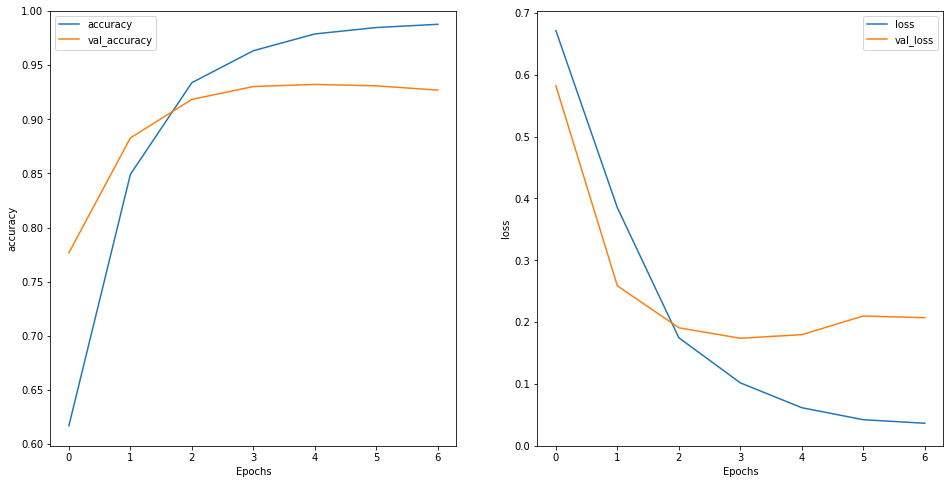

In [23]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [24]:
# Predicting test set
model.evaluate(X_test, Y_test)[1]

48/48 [==============================] - 4s 90ms/step - loss: 0.2071 - accuracy: 0.9269


0.926877498626709

**With Text Augmentation**

In [73]:
# Read csv

df = pd.read_csv("COVID Fake News Text Augmentation.csv")
df

,Unnamed: 0,Date Posted,Text,Label
0,0,2/11/20,just in novel coronavirus named covid-19 un he...,1
1,1,2/12/20,who officially names coronavirus as covid-19 c...,1
2,2,2/12/20,the un health agency announced that covid-19 w...,1
3,3,2/14/20,the indian embassy in tokyo has said that one ...,1
4,4,2/15/20,ground zero how kerala used its experience in ...,1
...,...,...,...,...
15171,15171,NaN,bill gates said that the covid - nineteen vacc...,0
15172,15172,NaN,covid - 19 vaccine candidates leave insert mic...,0
15173,15173,NaN,an image claims that chroma screen panels are ...,0
15174,15174,NaN,alexandria ocasio - hernando cortez tweeted it...,0


In [74]:
df = df[df['Text'].notna()]
df

,Unnamed: 0,Date Posted,Text,Label
0,0,2/11/20,just in novel coronavirus named covid-19 un he...,1
1,1,2/12/20,who officially names coronavirus as covid-19 c...,1
2,2,2/12/20,the un health agency announced that covid-19 w...,1
3,3,2/14/20,the indian embassy in tokyo has said that one ...,1
4,4,2/15/20,ground zero how kerala used its experience in ...,1
...,...,...,...,...
15171,15171,NaN,bill gates said that the covid - nineteen vacc...,0
15172,15172,NaN,covid - 19 vaccine candidates leave insert mic...,0
15173,15173,NaN,an image claims that chroma screen panels are ...,0
15174,15174,NaN,alexandria ocasio - hernando cortez tweeted it...,0


In [75]:
#get max sequence length
result = []

def longest_tweet(text, result):
  result.append(len(text))

df["Text"].apply(lambda x: longest_tweet(x, result))
max(result)

493

In [76]:
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (15172, 429)


In [78]:
# Y = pd.get_dummies(df['Binary Label']).values
# print('Shape of label tensor:', Y.shape)
Y = df["Label"]

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(12137, 429) (12137,)
(3035, 429) (3035,)


In [86]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each review.
MAX_SEQUENCE_LENGTH = 429
# This is fixed.
EMBEDDING_DIM = 64
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 15402 unique tokens.


In [87]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(64, dropout=0.4)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [88]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
epochs = 20
batch_size = 256

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_test, Y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/20
48/48 [==============================] - 115s 2s/step - loss: 0.5485 - accuracy: 0.7221 - val_loss: 0.2458 - val_accuracy: 0.9044
Epoch 2/20
48/48 [==============================] - 110s 2s/step - loss: 0.1701 - accuracy: 0.9338 - val_loss: 0.1263 - val_accuracy: 0.9516
Epoch 3/20
48/48 [==============================] - 109s 2s/step - loss: 0.0849 - accuracy: 0.9688 - val_loss: 0.0850 - val_accuracy: 0.9674
Epoch 4/20
48/48 [==============================] - 107s 2s/step - loss: 0.0508 - accuracy: 0.9835 - val_loss: 0.0751 - val_accuracy: 0.9694
Epoch 5/20
48/48 [==============================] - 108s 2s/step - loss: 0.0347 - accuracy: 0.9889 - val_loss: 0.0613 - val_accuracy: 0.9756
Epoch 6/20
48/48 [==============================] - 108s 2s/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0963 - val_accuracy: 0.9687
Epoch 7/20
48/48 [==============================] - 108s 2s/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0664 - val_accuracy: 0.9766
Epoch 8/20
48

In [89]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.5755214411299676)

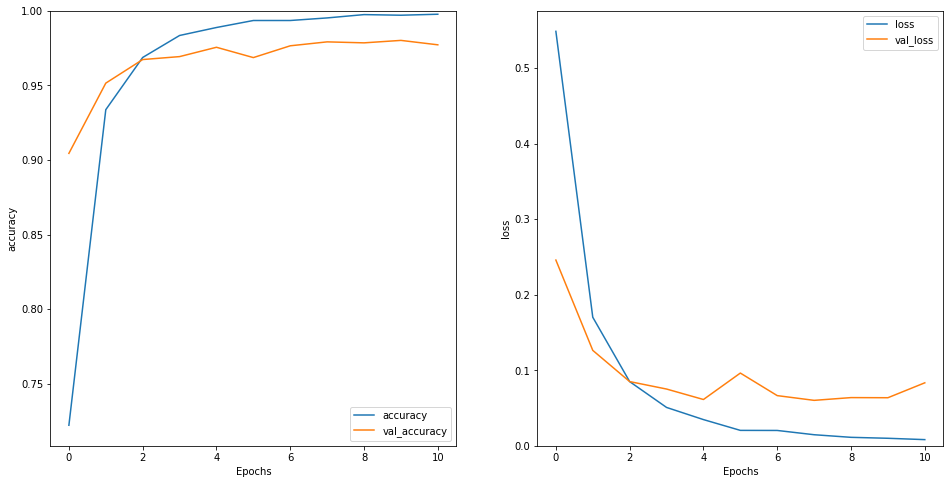

In [90]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [91]:
# Predicting test set
model.evaluate(X_test, Y_test)[1]

95/95 [==============================] - 8s 88ms/step - loss: 0.0834 - accuracy: 0.9773


0.9772652387619019